In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x_train=np.array([1.0,2.0])
y_train=np.array([300.0,500.0])
print(f'x_train={x_train}')
print(f'y_train={y_train}')

x_train=[1. 2.]
y_train=[300. 500.]


In [3]:
print(f'x_train.shape={x_train.shape}')
print(f'number of training examples={x_train.shape[0]}') # number of rows
print(f'number of training example={len(x_train)}')

x_train.shape=(2,)
number of training examples=2
number of training example=2


In [4]:
a=np.array([[1,2,3],[4,5,6]])
print(a.shape[1]) # return number of column

3


In [5]:
i=0
x_i=x_train[i]
y_i=y_train[i]
for i in range(x_train.shape[0]):
    print(f'(x^{i},y^{i})={float(x_train[i]),float(y_train[i])}')

(x^0,y^0)=(1.0, 300.0)
(x^1,y^1)=(2.0, 500.0)


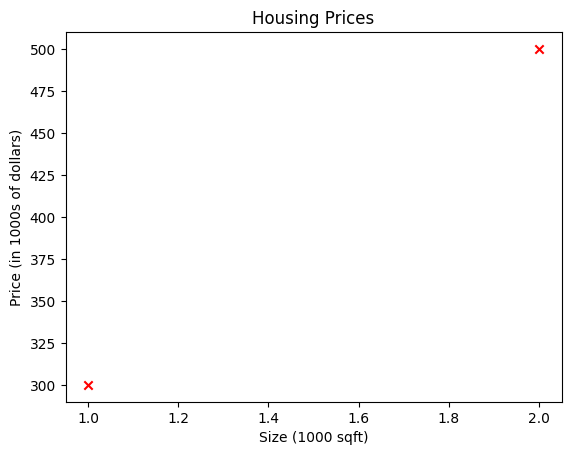

In [ ]:
plt.scatter(x_train,y_train,marker='x',c='r')
plt.title('Housing Prices')
plt.ylabel('Price (in 1000s of dollars)')
plt.xlabel('Size (1000 sqft)')
plt.show()

In [7]:
def compute_model_output(x,w,b):
  m=x.shape[0]
  f_wb=np.zeros(m)
  for i in range(m):
    f_wb[i]=w*x[i]+b
  return f_wb

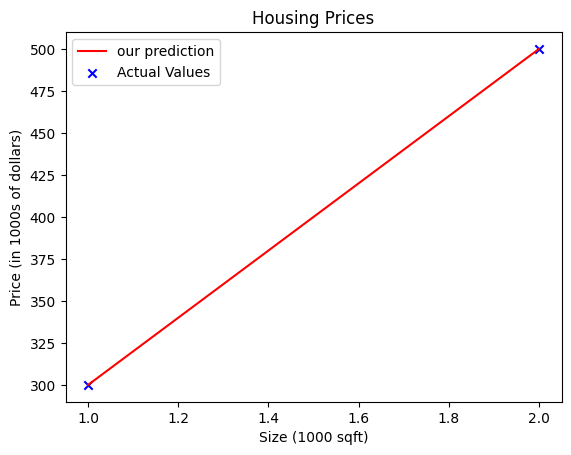

In [ ]:
tmp_f=compute_model_output(x_train,200,100)
plt.plot(x_train,tmp_f,color='r',label="our prediction")
plt.scatter(x_train,y_train,marker='x',c='b',label="Actual Values")
plt.title("Housing Prices")
plt.ylabel('Price (in 1000s of dollars)')
plt.xlabel('Size (1000 sqft)')
plt.legend()
plt.show()

In [9]:
x_train=np.array([1.0,2.0])
y_train=np.array([300.0,500.0])

In [10]:
def compute_cost(x,y,w,b):
  m=x.shape[0]
  cost_sum=0
  for i in range(m):
    f_wb=w*x[i]+b
    cost_sum+=(f_wb-y[i])**2
  total_cost=cost_sum/(2*m)
  return total_cost

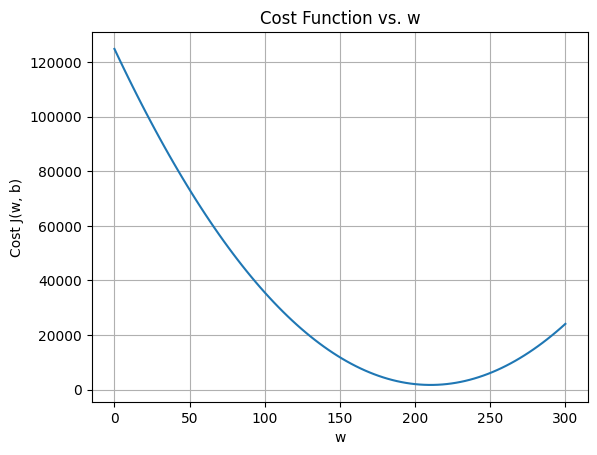

In [ ]:
x_train = np.array([1.0, 1.7, 2.0, 2.5, 3.0, 3.2])
y_train = np.array([250, 300, 480, 430, 630, 730])

w_vals = np.linspace(0, 300, 100)
#(start,end ,num)
cost_vals = []

b = 0  # ثابت مؤقتًا

for w in w_vals:
    cost = compute_cost(x_train, y_train, w, b)
    cost_vals.append(cost)

plt.plot(w_vals, cost_vals)
plt.xlabel('w')
plt.ylabel('Cost J(w, b)')
plt.title('Cost Function vs. w')
plt.grid(True)
plt.show()

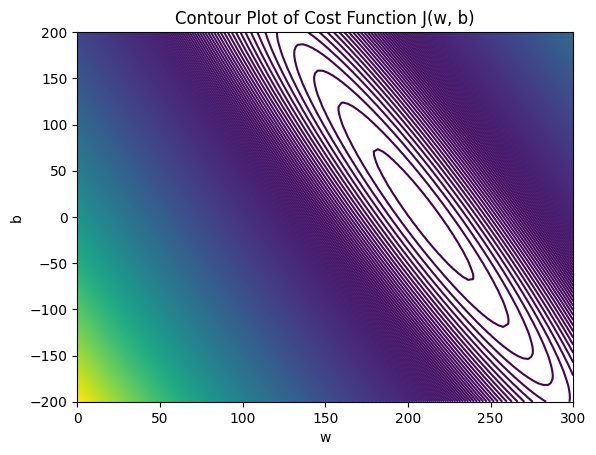

In [ ]:
w_vals = np.linspace(0, 300, 100)
b_vals = np.linspace(-200, 200, 100)
J_vals = np.zeros((len(b_vals), len(w_vals)))
for i in range(len(b_vals)):
    for j in range(len(w_vals)):
        J_vals[i, j] = compute_cost(x_train, y_train, w_vals[j], b_vals[i])

W, B = np.meshgrid(w_vals, b_vals)

plt.contour(W, B, J_vals, levels=500, cmap='viridis')
plt.xlabel('w')
plt.ylabel('b')
plt.title('Contour Plot of Cost Function J(w, b)')
plt.show()

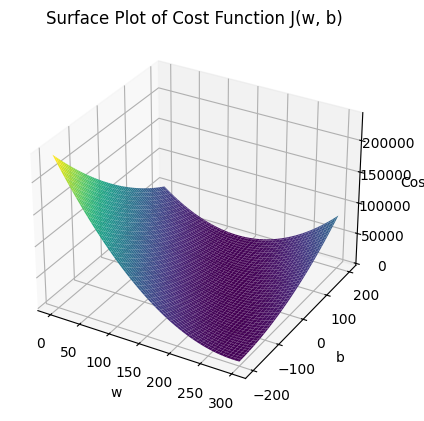

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W, B, J_vals, cmap='viridis')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Cost')
ax.set_title('Surface Plot of Cost Function J(w, b)')
plt.show()

In [ ]:
#grediant
#1-compute_gredient
#2-compute_cost
#3-gradient_descent

In [14]:
def compute_gradient(x,y,w,b):
  m=x.shape[0]
  dj_dw=0
  dj_db=0
  for i in range(m):
    f_wb=w*x[i]+b
    dj_dw_i=(f_wb-y[i])*x[i]
    dj_db_i=(f_wb-y[i])
    dj_db+=dj_db_i
    dj_dw+=dj_dw_i
  dj_dw/=m
  dj_db/=m
  return dj_dw,dj_db

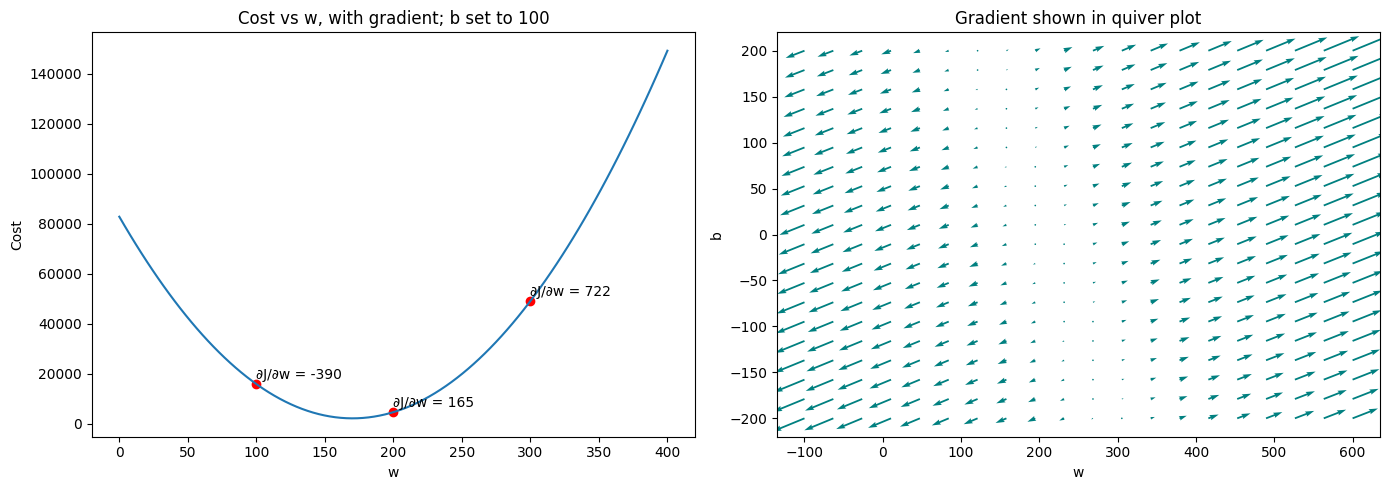

In [ ]:
def plt_gradients(x, y, compute_cost, compute_gradient):
    w_vals = np.linspace(0, 400, 100)
    cost_vals = [compute_cost(x, y, w, 100) for w in w_vals]

    fig, axs = plt.subplots(1, 2, figsize=(14, 5))

    axs[0].plot(w_vals, cost_vals, label='Cost')
    axs[0].set_title("Cost vs w, with gradient; b set to 100")
    axs[0].set_xlabel("w")
    axs[0].set_ylabel("Cost")

    for w in [100, 200, 300]:
        dj_dw, _ = compute_gradient(x, y, w, 100)
        cost = compute_cost(x, y, w, 100)
        axs[0].scatter(w, cost, color='red')
        axs[0].annotate(f"∂J/∂w = {int(dj_dw)}", (w, cost + 2000), fontsize=10)

    w_range = np.linspace(-100, 600, 20)
    b_range = np.linspace(-200, 200, 20)
    W, B = np.meshgrid(w_range, b_range)
    dJ_dw = np.zeros_like(W)
    dJ_db = np.zeros_like(B)

    for i in range(W.shape[0]):
        for j in range(W.shape[1]):
            dJ_dw[i, j], dJ_db[i, j] = compute_gradient(x, y, W[i, j], B[i, j])

    axs[1].quiver(W, B, dJ_dw, dJ_db, color='teal')
    axs[1].set_title("Gradient shown in quiver plot")
    axs[1].set_xlabel("w")
    axs[1].set_ylabel("b")

    plt.tight_layout()
    plt.show()

plt_gradients(x_train, y_train, compute_cost, compute_gradient)


In [ ]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, compute_cost, compute_gradient, verbose=True):
    w = w_in
    b = b_in
    J_history = []
    p_history = [] 
    for i in range(num_iters):
       
        dj_dw, dj_db = compute_gradient(x, y, w, b)

    
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        if i < 100000:  
            cost = compute_cost(x, y, w, b)
            J_history.append(cost)
            p_history.append([w,b])


        if verbose and i % 100 == 0:
            print(f"Iteration {i:4}: Cost {cost:10.4f}, w = {w:10.4f}, b = {b:10.4f}")

    return w, b, J_history, p_history 

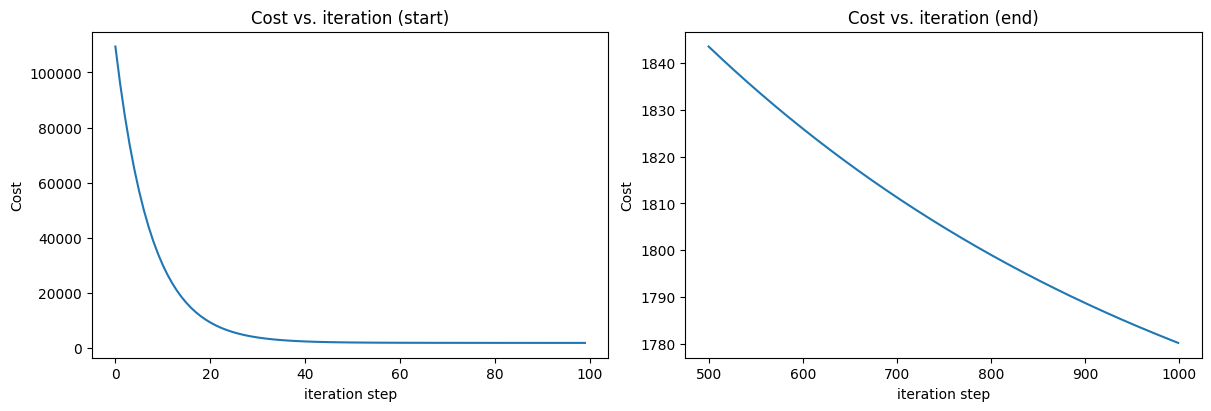

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))

ax1.plot(J_hist[:100])
ax1.set_title("Cost vs. iteration (start)")
ax1.set_xlabel("iteration step")
ax1.set_ylabel("Cost")

start_idx = len(J_hist) // 2
ax2.plot(start_idx + np.arange(len(J_hist[start_idx:])), J_hist[start_idx:])
ax2.set_title("Cost vs. iteration (end)")
ax2.set_xlabel("iteration step")
ax2.set_ylabel("Cost")

plt.show()


In [23]:
print(f"1000 sqft house prediction {final_w*1.0 + final_b:0.1f} Thousand dollars")
print(f"1200 sqft house prediction {final_w*1.2 + final_b:0.1f} Thousand dollars")
print(f"2000 sqft house prediction {final_w*2.0 + final_b:0.1f} Thousand dollars")

1000 sqft house prediction 229.1 Thousand dollars
1200 sqft house prediction 268.6 Thousand dollars
2000 sqft house prediction 426.5 Thousand dollars


In [ ]:
def plt_contour_wgrad(x, y, p_hist, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 6))

    w_vals = np.linspace(-100, 500, 100)
    b_vals = np.linspace(-400, 400, 100)
    W, B = np.meshgrid(w_vals, b_vals)

    Z = np.zeros_like(W)
    for i in range(W.shape[0]):
        for j in range(W.shape[1]):
            Z[i, j] = compute_cost(x, y, W[i, j], B[i, j])

    contour = ax.contour(W, B, Z, levels=100, cmap='plasma')
    ax.clabel(contour, inline=1, fontsize=8)
    ax.set_xlabel("w")
    ax.set_ylabel("b")
    ax.set_title("Contour plot of cost J(w,b), vs b,w with path of gradient descent")

    p_hist = np.array(p_hist)
    ax.plot(p_hist[:, 0], p_hist[:, 1], color='red', marker='^')
    ax.quiver(p_hist[:-1, 0], p_hist[:-1, 1],
              p_hist[1:, 0] - p_hist[:-1, 0],
              p_hist[1:, 1] - p_hist[:-1, 1],
              scale_units='xy', angles='xy', scale=1, color='red')

    ax.grid(True)


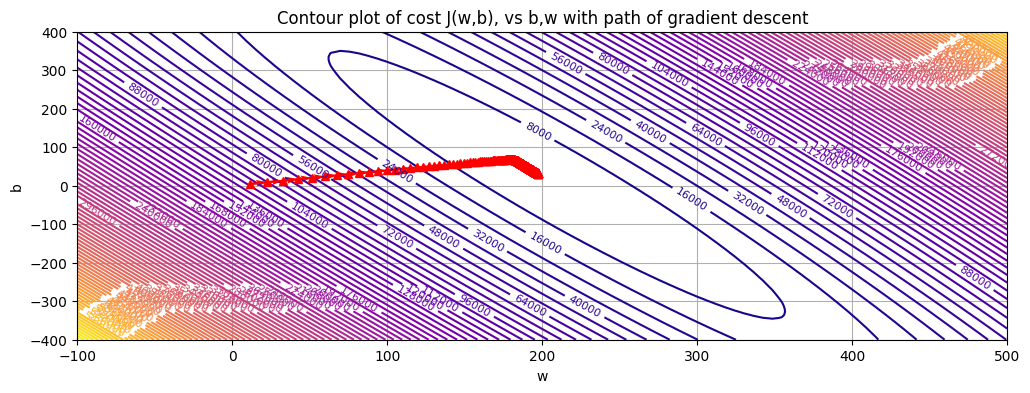

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
plt_contour_wgrad(x_train, y_train, p_hist, ax)
plt.show()